# 6.1 Tau Congeneric models

## **The dataset**

For this exercise we use a dataset from Lischetzke (2003). The construct we want to measure is **emotional clarity** by means of reaction times (RT) on a mood intensity scale. It is assumed that the faster people assess their mood, the greater the emotional clarity.

## **Load and inspect the full data set**


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
file_name = "/Users/amnesia/Desktop/repos/psy126/book/TT/8_Quantitative_IRT/data/Data_EmotionalClarity.dat"
dat = pd.read_csv(file_name, sep="\t")
print(dat.head())


   sex    item_1    item_2    item_3    item_4    item_5    item_6
0    1  1.463255  1.739589  1.384292  1.568408  1.457452  1.628260
1    1  1.689358  1.789256  1.771557  1.696533  1.395997  1.842294
2    0  1.300736  1.492455  1.347294  1.178347  1.784903  1.221125
3    0  1.588419  1.459545  1.300736  1.278152  1.145496  1.446213
4    0  1.182953  0.914289  0.997686  1.357895  0.875052  1.232852


## **Extract items 1 to 6 for the analysis**

In [11]:
dat2 = dat.iloc[:, 1:7]
print(dat2.head())

     item_1    item_2    item_3    item_4    item_5    item_6
0  1.463255  1.739589  1.384292  1.568408  1.457452  1.628260
1  1.689358  1.789256  1.771557  1.696533  1.395997  1.842294
2  1.300736  1.492455  1.347294  1.178347  1.784903  1.221125
3  1.588419  1.459545  1.300736  1.278152  1.145496  1.446213
4  1.182953  0.914289  0.997686  1.357895  0.875052  1.232852


## **Compute and plot the covariance/correlation matrix**
Use the following snippet to compute and plot the covariance/correlation matrix.

          item_1    item_2    item_3    item_4    item_5    item_6
item_1  0.128924  0.063721  0.063875  0.066945  0.044849  0.056841
item_2  0.063721  0.136013  0.066922  0.069953  0.065735  0.056597
item_3  0.063875  0.066922  0.153899  0.081548  0.065970  0.065104
item_4  0.066945  0.069953  0.081548  0.166135  0.072298  0.075799
item_5  0.044849  0.065735  0.065970  0.072298  0.142077  0.054706
item_6  0.056841  0.056597  0.065104  0.075799  0.054706  0.146929
          item_1    item_2    item_3    item_4    item_5    item_6
item_1  1.000000  0.481200  0.453468  0.457424  0.331381  0.412995
item_2  0.481200  1.000000  0.462554  0.465358  0.472874  0.400359
item_3  0.453468  0.462554  1.000000  0.509996  0.446138  0.432950
item_4  0.457424  0.465358  0.509996  1.000000  0.470581  0.485157
item_5  0.331381  0.472874  0.446138  0.470581  1.000000  0.378636
item_6  0.412995  0.400359  0.432950  0.485157  0.378636  1.000000


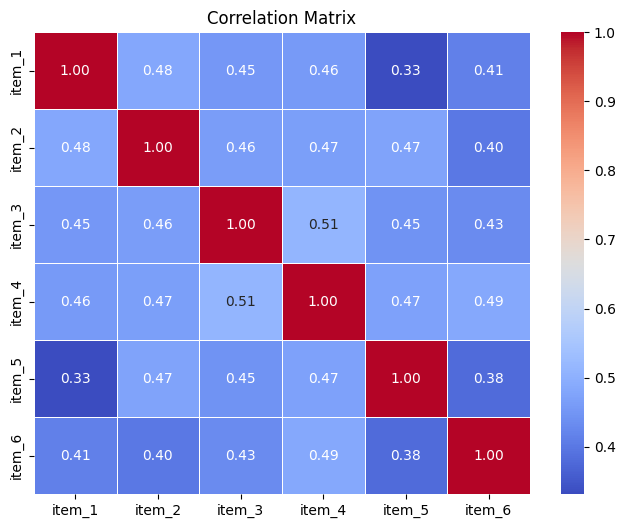

In [17]:
print(dat2.cov())  # Covariance matrix
print(dat2.corr())  # Correlation matrix

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dat2.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## **Compute the mean response vector**
Try this by yourself before exploring the solution.

In [ ]:
means = dat2.mean()  # Column-wise mean
print(means)



0      1.540209
1      1.697499
2      1.387477
3      1.369760
4      1.093455
         ...   
233    1.804139
234    1.569039
235    1.685559
236    1.165121
237    0.192567
Length: 238, dtype: float64


## **Compute the item SDs and Variances**
In this code chunk lets now calculate the SDs and variances **for every item**.
Try using the apply as it was just explained above.

In [ ]:
sds = dat2.std()        # Column-wise standard deviation
print(sds)
print()

variances = dat2.var()  # Column-wise variance
print(variances)

item_1    0.359060
item_2    0.368799
item_3    0.392299
item_4    0.407597
item_5    0.376931
item_6    0.383313
dtype: float64

item_1    0.128924
item_2    0.136013
item_3    0.153899
item_4    0.166135
item_5    0.142077
item_6    0.146929
dtype: float64


# Tau-Congeneric Measurement Model
We will now start testing the measurement models that were covered in lecture section of this course two weeks ago.

The **Tau Congeneric** measurement model is the least restrictive one out of the measurement models that we will use today. It assumes that:

* items differ in their difficulty
* items differ in their discrimination power
* items are differently reliable  

We therefore get an estimate for the loading (`Latent Variables` section), for the intercept (`Intecepts` section) and for the errors (`Variances` section) respectively.

## Fit the model
We are now going to define the model using `lavaan` syntax.

In [34]:
# Fit the congeneric measurement model using semopy
from semopy import Model, calc_stats

model_desc = '''
eta =~ item_1 + item_2 + item_3 + item_4 + item_5 + item_6
'''

model = Model(model_desc)
model.fit(dat2)

print("Parameter Estimates (standardized):")
print(model.inspect(std_est=True))

print("\nFit Statistics:")
print(calc_stats(model))


Parameter Estimates (standardized):
      lval  op    rval  Estimate  Est. Std  Std. Err   z-value p-value
0   item_1   ~     eta  1.000000  0.638251         -         -       -
1   item_2   ~     eta  1.098223  0.682506  0.130676  8.404167     0.0
2   item_3   ~     eta  1.193818  0.697492  0.139843  8.536853     0.0
3   item_4   ~     eta  1.294194  0.727740  0.147223  8.790688     0.0
4   item_5   ~     eta  1.032245  0.627708  0.130861  7.888077     0.0
5   item_6   ~     eta  1.049588  0.627623  0.133074  7.887244     0.0
6      eta  ~~     eta  0.052318  1.000000  0.010359  5.050348     0.0
7   item_1  ~~  item_1  0.076112  0.592636  0.008128  9.363858     0.0
8   item_2  ~~  item_2  0.072362  0.534185  0.008093  8.941514     0.0
9   item_3  ~~  item_3  0.078703  0.513505  0.008975  8.768841     0.0
10  item_4  ~~  item_4  0.077832  0.470394  0.009308   8.36191     0.0
11  item_5  ~~  item_5  0.085735  0.605982  0.009074  9.448611     0.0
12  item_6  ~~  item_6  0.088680  0.60608

### **Model fit**

Before we look at the model parameters, lets first look at the model fit indices (remember them ;) ?).  
The insignificant p-value for the $\chi^2$ test indicates that our model implied correlation matrix doesn't deviate significantly from the data implied correlation matrix, suggesting a good fit. Furthermore, the CFI and TLI are > .95, also indicating a good fit. AIC and BIC can't be interpreted individually but will be later used for comparing models (see below). Lastly, the RMSEA and SRMR are also < .08, also suggesting a good fit. In summary, all indices suggest that the models fits our data well.  
As a reminder - the usual limit value / criteria for the various fit indices:

* $\chi^2$ Test: Insignificance (p-value) suggests good fit, larger $\chi^2$ values (test statistics) indicate worse fit
* CFI & TLI: Values closer to 1 indicate good fit, > .95 desirable
* AIC & BIC: Can't be interpreted individually! Only for model comparison
* RMSEA & SRMR: Smaller values indicate better fit, < .08 desirable

### **Latent variables section**

Increasing loadings can be interpreted as the respective item having a higher discrimination power.
For example, `item_1` has a loading of 1.098 while `item_4` has a loading of 1.294, meaning that the same increase in the latent variable (i.e. the trait we
measure) results in a larger difference in `item_4` compared to `item_1`. Graphically this is represented by `item_4` having a steeper slope. You might notice that the loading are quite similar across the items, keep this in mind for later.

### **Intercepts section**

The intercepts can be used to interpret the difficulty of the item. Here, bigger values indicate that an item is **more** difficult. However, watch out: The interpretation can differ in other cases. Here, larger intercepts relate to larger reaction times, meaning, according to the theory, the mood which is assessed with this item is 'less emotionally clear'. On the other hand, if we would like to assess intelligence by the percentage of correct answers in a test, a larger intercept would mean that even individuals with 0 (or average, if centered) intelligence would end up with a large percentage of correct answers, meaning our item is actually to **easy**.
(Technically, you can always say that an item associated with a larger intercept is more difficult. However, the explicit interpretation can differ).

### **Variances section**

The Variances refer to the reliability of the items. Speaking in a 'CFA-Language', they represent the residuals (errors) associated with the items. In the last row, the variance of the latent variable is shown.
